In [78]:
import pandas as pd
import numpy as np
import scipy
import re
import string

In [79]:
read_file = pd.read_csv(r'C:\Users\user\Desktop\nw.csv')

In [80]:
read_file.head(3)

,Brands,reviews,recommended,rating
0,Global Desi,My experience is very bad.The fabric quality i...,0.0,2.0
1,Global Desi,I love shopping. I like to buy unique design.,1.0,4.0
2,Global Desi,many people like this company products becaus...,1.0,4.0


In [81]:
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [83]:
# Pre-Processing
import nltk
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
read_file['reviews']=read_file['reviews'].astype(str)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
read_file['Polarity Score'] =read_file['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
read_file.head(5)

,Brands,reviews,recommended,rating,Polarity Score
0,Global Desi,My experience is very bad.The fabric quality i...,0.0,2.0,-0.236667
1,Global Desi,I love shopping. I like to buy unique design.,1.0,4.0,0.437500
2,Global Desi,many people like this company products becaus...,1.0,4.0,0.640000
3,Global Desi,new collection was amazing the designs were s...,1.0,4.0,0.478788
4,Global Desi,I hated the fact that the Kurta overpriced too.,0.0,2.0,-0.900000


In [85]:
d=read_file.copy()

In [86]:
from textblob import TextBlob

bloblist=list()

for row in read_file['reviews'].astype(str):
    blob=TextBlob(row)
    bloblist.append((row,blob.sentiment.polarity,blob.subjectivity))
    df_data_senti=pd.DataFrame(bloblist,columns=['row','Sentiment','Polarity'])
read_file=pd.concat([read_file,df_data_senti],axis=1)
#ead_file.drop('row',axis=1,inplace=True)

In [87]:
print(df_data_senti.head(3))

                                                 row  Sentiment  Polarity
0  My experience is very bad.The fabric quality i...  -0.236667  0.388889
1     I love shopping. I like to buy unique design.    0.437500  0.800000
2   many people like this company products becaus...   0.640000  0.750000


In [88]:
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter

In [89]:
SIA = SentimentIntensityAnalyzer()
read_file["reviews"]=read_file["reviews"].astype(str)

In [90]:
# Applying Model, Variable Creation
read_file['Polarity Score'] = read_file['reviews'].apply(lambda x: SIA.polarity_scores(x)['compound'])
read_file['Neutral Score'] = read_file['reviews'].apply(lambda x: SIA.polarity_scores(x)['neu'])
read_file['Negative Score'] =read_file['reviews'].apply(lambda x: SIA.polarity_scores(x)['neg'])
read_file['Positive Score'] =read_file['reviews'].apply(lambda x: SIA.polarity_scores(x)['pos'])

In [91]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
read_file['Sentiment']=''
read_file.loc[read_file['Polarity Score']>0,'Sentiment']='Positive'
read_file.loc[read_file['Polarity Score']==0,'Sentiment']='Neutral'
read_file.loc[read_file['Polarity Score']<0,'Sentiment']='Negative'

In [92]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

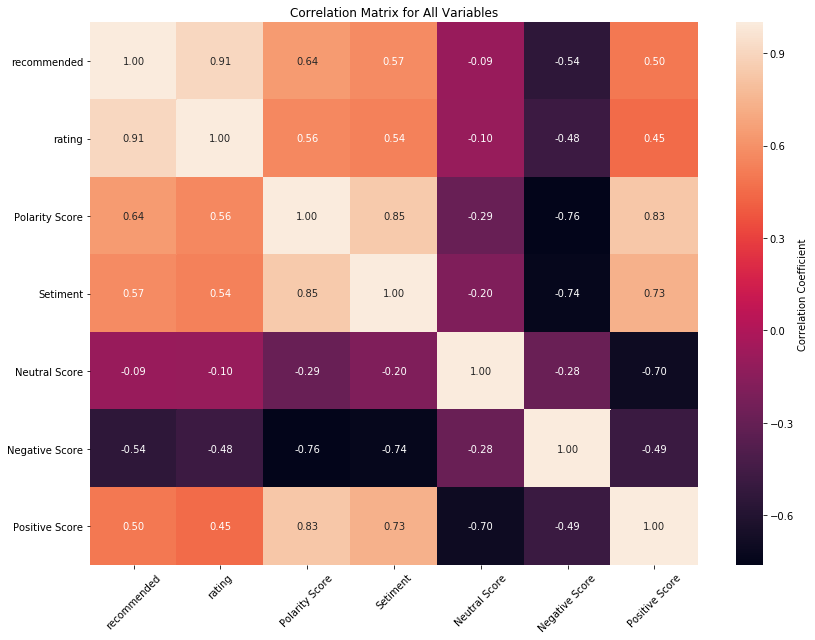

In [93]:
f, ax = plt.subplots(figsize=[12, 9])
ax = sns.heatmap(newDf.corr(), annot=True,
                 fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for All Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('corr-all.png', format='png', dpi=300)
plt.show()

In [94]:
def getDuplicateColumns(read_file):

    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(read_file.shape[1]):
        # Select column at xth index.
        col = read_file.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1,read_file.shape[1]):
            # Select column at yth index.
            otherCol = read_file.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(read_file.columns.values[y])
 
    return list(duplicateColumnNames)
duplicateColumnNames = getDuplicateColumns(read_file)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  row


In [95]:
newDf = read_file.drop(columns=getDuplicateColumns(read_file))
 
print("Modified Dataframe", newDf, sep='\n')

Modified Dataframe
               Brands                                            reviews  \
0         Global Desi  My experience is very bad.The fabric quality i...   
1         Global Desi     I love shopping. I like to buy unique design.    
2         Global Desi   many people like this company products becaus...   
3         Global Desi   new collection was amazing the designs were s...   
4         Global Desi   I hated the fact that the Kurta  overpriced too.   
5         Global Desi                       Nice fit  and love material    
6         Global Desi                              super fabric must buy   
7         Global Desi                               worst fabric quality   
8         Global Desi                                  I love the dress.   
9         Global Desi                        Beautiful  and unique color   
10                NaN                                                nan   
11           Fabindia  Clothes are expensive, yet they leave colour, 

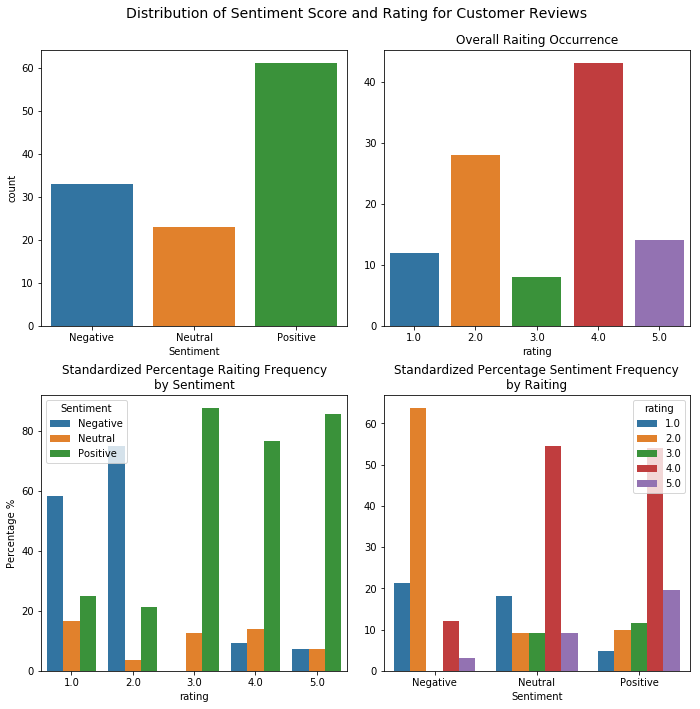

In [100]:
f, axes = plt.subplots(2, 2, figsize=[10, 10])
sns.countplot(x="Sentiment", data=newDf , ax=axes[0,0], order=["Negative","Neutral","Positive"])

sns.countplot(x="rating", data=newDf , ax=axes[0,1])
axes[0,1].set_xlabel("rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Rating Occurrence")

percentstandardize_barplot(x="rating",y="Percentage",hue="Sentiment",data=newDf, ax=axes[1,0])
axes[1,0].set_xlabel("rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Rating Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="rating",data=newDf, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Rating")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")


f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

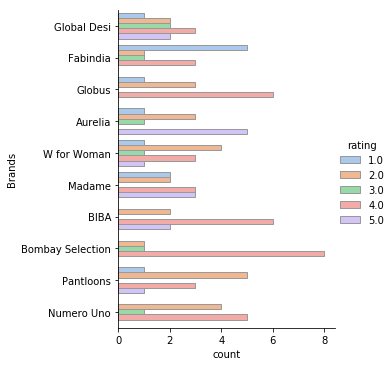

In [108]:
sns.catplot(y="Brands", hue="rating", kind="count",
            palette="pastel", edgecolor=".6",
            data=read_file);

# List on the basis of rating:
1)Bombay selection

2)biba

3)globus

4)aurelia

5)numero uno

6)madame

7)global desi

8)w for woman

9)fab india

10)pantaloons

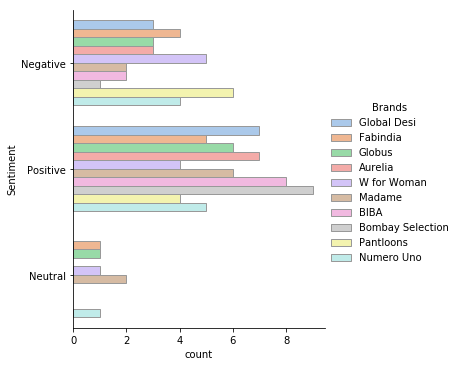

In [110]:
sns.catplot(y="Sentiment", hue="Brands", kind="count",
            palette="pastel", edgecolor=".6",
            data=read_file);

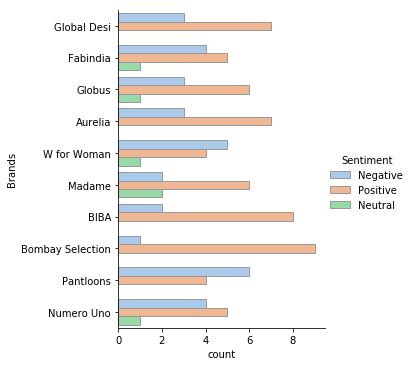

In [111]:
sns.catplot(y="Brands", hue="Sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=read_file);

# List on the basis of sentiment analysis:
1)Bomabay Selection

2)Biba

3)Global Desi

4)Aurelia

5)Globus

6)Madame

7)Fab India

8)Numero Uno

9)W for woman

10)Pantaloons